In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
data=pd.read_csv(r"C:\Users\varsha\Desktop\python dataset\car_data.csv")

In [28]:
data.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [29]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [30]:
# chenge the name of column in proper format
data=data.rename(columns={"Engine HP":"Engine_HP"})

In [31]:
data.Engine_HP.value_counts()

200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
        ... 
660.0      1
661.0      1
573.0      1
592.0      1
154.0      1
Name: Engine_HP, Length: 356, dtype: int64

In [32]:
data.Engine_HP=data.Engine_HP.fillna(154.0)

In [33]:
data.Make.value_counts().head()

Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64

In [34]:
data1=(data[data["Make"]=="Volkswagen"])[["Make","Engine_HP","MSRP"]]

In [44]:
data1.head()
#data1.shape

,Make,Engine_HP,MSRP
1792,Volkswagen,170.0,27295
1793,Volkswagen,210.0,31795
1794,Volkswagen,210.0,34895
1795,Volkswagen,170.0,27295
1796,Volkswagen,140.0,32755


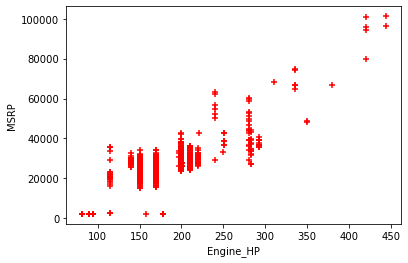

In [36]:
%matplotlib inline
plt.xlabel('Engine_HP')
plt.ylabel('MSRP')
plt.scatter(data1.Engine_HP,data1.MSRP,color="red",marker="+")

In [37]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

In [38]:
ln.fit(data1[["Engine_HP"]],data1.MSRP) # here our independent should be 2dim array "Engine_HP"

LinearRegression()

In [66]:
pred=ln.predict(data1[["Engine_HP"]])
#print('R2 score: %.2f' % r2_score(data1[["Engine_HP"]],pred))
pred.ndim

1

In [41]:
ln.coef_ #m slope

array([186.95358855])

In [42]:
ln.intercept_ # b= intercept

-7373.507036199939

In [45]:
#y=mx+b
186.95358855*210+-7373.507036199939 #  x=210,  y=31886.74655930006

31886.74655930006

In [78]:
def car_price(Engine_HP):
    y=(ln.coef_ )*Engine_HP+(ln.intercept_)
    print(y)
    
car_price(170) 

[24408.60301688]


In [90]:
Engine_HP=int(input('Enter Volkswagen cars Horse power : '))
print('This Volkswagen price will be : ₹',(car_price(Engine_HP)))

Enter Volkswagen cars Horse power : 22
[-3260.52808815]
This Volkswagen price will be : ₹ None
